## Chapter 3.5 뉴스 기사 분류: 다중 분류 문제

### Loading Reuters Data Set

In [2]:
from keras.datasets import reuters


### data split

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words= 10000)

 - 원래 텍스트로 디코딩하기

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newwire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 3s 6us/step


In [4]:
decoded_newwire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### data preprocessing

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### multi- label :: one hot encoidng

In [7]:
def to_one_hot(labels, dimension =46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = i
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

 - 16차원의 공간으로 46개의 클래스를 구분하기엔 너무 제약이 많다. // 한 layer 에서 분류 문제에 필요한 일부 정보를 누락하면 그 다음 충에서 이를 복원할 수 없다.
 - 64개의 유닛으로 시도

### Model Construction

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### model compile

In [27]:
from keras import losses

In [28]:
model.compile(optimizer='rmsprop',
             loss=losses.categorical_crossentropy,
             metrics=['accuracy'])

#### model validation

In [20]:
x_val = x_train[:1000]
partial_x_train = x_test[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_test_labels[1000:]

In [29]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 1246 samples, validate on 1000 samples
Epoch 1/20
1246/1246 [==============================] - 0s 230us/step - loss: 373.1218 - acc: 0.9623 - val_loss: 708.4649 - val_acc: 0.6940
Epoch 2/20
1246/1246 [==============================] - 0s 98us/step - loss: 256.6929 - acc: 0.9759 - val_loss: 650.5784 - val_acc: 0.7390
Epoch 3/20
1246/1246 [==============================] - 0s 97us/step - loss: 202.4050 - acc: 0.9831 - val_loss: 660.6828 - val_acc: 0.7330
Epoch 4/20
1246/1246 [==============================] - 0s 97us/step - loss: 174.0243 - acc: 0.9848 - val_loss: 650.8749 - val_acc: 0.7350
Epoch 5/20
1246/1246 [==============================] - 0s 98us/step - loss: 156.8521 - acc: 0.9880 - val_loss: 712.4924 - val_acc: 0.7080
Epoch 6/20
1246/1246 [==============================] - 0s 98us/step - loss: 133.8056 - acc: 0.9896 - val_loss: 675.8859 - val_acc: 0.7270
Epoch 7/20
1246/1246 [==============================] - 0s 98us/step - loss: 119.9623 - acc: 0.9880 - val_loss: 690.9

### visualization

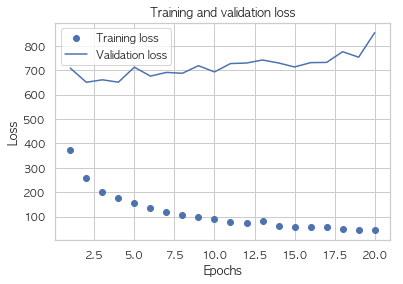

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

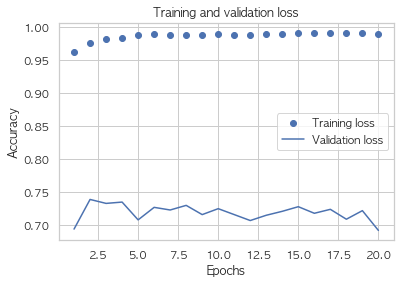

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 과대적합을 피하기 위해 9th epoch 까지 진행

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 1246 samples, validate on 1000 samples
Epoch 1/9
1246/1246 [==============================] - 0s 265us/step - loss: 6047.0858 - acc: 0.2303 - val_loss: 1652.4285 - val_acc: 0.4820
Epoch 2/9
1246/1246 [==============================] - 0s 96us/step - loss: 4927.8334 - acc: 0.4848 - val_loss: 1360.9729 - val_acc: 0.5290
Epoch 3/9
1246/1246 [==============================] - 0s 97us/step - loss: 3842.0599 - acc: 0.5658 - val_loss: 1171.8116 - val_acc: 0.5380
Epoch 4/9
1246/1246 [==============================] - 0s 96us/step - loss: 3074.1580 - acc: 0.6404 - val_loss: 1034.8266 - val_acc: 0.5720
Epoch 5/9
1246/1246 [==============================] - 0s 97us/step - loss: 2509.6770 - acc: 0.6966 - val_loss: 938.9534 - val_acc: 0.6030
Epoch 6/9
1246/1246 [==============================] - 0s 96us/step - loss: 2104.9559 - acc: 0.7512 - val_loss: 875.4723 - val_acc: 0.6310
Epoch 7/9
1246/1246 [==============================] - 0s 97us/step - loss: 1799.3149 - acc: 0.7865 - val_loss: 8

In [36]:
results

[1007.6384136033504, 0.7858414960459524]

### model predict

In [37]:
prediction = model.predict(x_test)

### categorical_crossentropy & sparse_categorical_crossentropy

 - 정수 레이블을 사용할 때에는 sparse_categorical_crossentropy 를 사용해야 한다.

In [41]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrcis=['acc'])

### 46차원보다 작은 중간층을 두었을때의 문제

In [46]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 1246 samples, validate on 1000 samples
Epoch 1/9
1246/1246 [==============================] - 0s 370us/step - loss: 6065.0091 - acc: 0.0273 - val_loss: 1788.9307 - val_acc: 0.0590
Epoch 2/9
1246/1246 [==============================] - 0s 97us/step - loss: 5641.7494 - acc: 0.0482 - val_loss: 1726.3265 - val_acc: 0.0690
Epoch 3/9
1246/1246 [==============================] - 0s 98us/step - loss: 5375.8183 - acc: 0.0738 - val_loss: 1674.8371 - val_acc: 0.1310
Epoch 4/9
1246/1246 [==============================] - 0s 96us/step - loss: 5157.6922 - acc: 0.2151 - val_loss: 1635.7019 - val_acc: 0.2540
Epoch 5/9
1246/1246 [==============================] - 0s 98us/step - loss: 4968.3676 - acc: 0.2745 - val_loss: 1603.4127 - val_acc: 0.2460
Epoch 6/9
1246/1246 [==============================] - 0s 96us/step - loss: 4806.5682 - acc: 0.2624 - val_loss: 1568.3289 - val_acc: 0.2390
Epoch 7/9
1246/1246 [==============================] - 0s 95us/step - loss: 4655.4521 - acc: 0.2560 - val_loss:

### 추가 실험

#### 더 큰 은닉 유닛 사용

In [47]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 1246 samples, validate on 1000 samples
Epoch 1/9
1246/1246 [==============================] - 0s 316us/step - loss: 6083.6349 - acc: 0.2151 - val_loss: 1637.7244 - val_acc: 0.4810
Epoch 2/9
1246/1246 [==============================] - 0s 141us/step - loss: 4899.2971 - acc: 0.4920 - val_loss: 1326.7336 - val_acc: 0.5370
Epoch 3/9
1246/1246 [==============================] - 0s 141us/step - loss: 3734.9902 - acc: 0.5714 - val_loss: 1102.0734 - val_acc: 0.5600
Epoch 4/9
1246/1246 [==============================] - 0s 143us/step - loss: 2887.7554 - acc: 0.6621 - val_loss: 965.9047 - val_acc: 0.6060
Epoch 5/9
1246/1246 [==============================] - 0s 144us/step - loss: 2322.4369 - acc: 0.7183 - val_loss: 875.7419 - val_acc: 0.6260
Epoch 6/9
1246/1246 [==============================] - 0s 143us/step - loss: 1927.3903 - acc: 0.7640 - val_loss: 817.3449 - val_acc: 0.6650
Epoch 7/9
1246/1246 [==============================] - 0s 145us/step - loss: 1635.1562 - acc: 0.8050 - val_lo

#### 3개의 hidden layer 사용

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

Train on 1246 samples, validate on 1000 samples
Epoch 1/9
1246/1246 [==============================] - 0s 373us/step - loss: 6040.8462 - acc: 0.2319 - val_loss: 1587.0156 - val_acc: 0.4640
Epoch 2/9
1246/1246 [==============================] - 0s 141us/step - loss: 4651.0939 - acc: 0.4960 - val_loss: 1226.4498 - val_acc: 0.3740
Epoch 3/9
1246/1246 [==============================] - 0s 143us/step - loss: 3360.4514 - acc: 0.4984 - val_loss: 988.5439 - val_acc: 0.5460
Epoch 4/9
1246/1246 [==============================] - 0s 143us/step - loss: 2671.3590 - acc: 0.6140 - val_loss: 927.7487 - val_acc: 0.5390
Epoch 5/9
1246/1246 [==============================] - 0s 143us/step - loss: 2244.3484 - acc: 0.6798 - val_loss: 848.0217 - val_acc: 0.6060
Epoch 6/9
1246/1246 [==============================] - 0s 140us/step - loss: 1881.5144 - acc: 0.7424 - val_loss: 793.4181 - val_acc: 0.6580
Epoch 7/9
1246/1246 [==============================] - 0s 145us/step - loss: 1604.4232 - acc: 0.7937 - val_los